### 事前準備

GoogleDriveのマウント（事前ダウンロードしたOpenCV特徴ファイル(xml)を参照するため）

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **OpenCVを使った顔認識のサンプル（既成のモデルを使った手軽なAI）**

### OpenCVとは
> Open Source Computer Vision Libraryとしてインテルが開発・公開したオープンソースのコンピュータビジョン向けライブラリ。画像処理・画像解析および機械学習等の機能を持つC/C++、Java、Python、MATLAB用ライブラリで、プラットフォームとしてmacOSやFreeBSD等全てのPOSIXに準拠したUnix系OS、Linux、Windows、Android、iOS等をサポートしている。

[詳細はこちら(https://opencv.org)](https://opencv.org/)


### **準備（PC-Camera）**

PC-Cameraを使えるようにする

In [2]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

**PC-Cameraで静止画を撮る**

In [3]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

<IPython.core.display.Javascript object>

NotReadableError: Could not start video source


### **OpenCVで顔認識**

**撮影した画像から顔認識**

In [ ]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
img=cv2.imread("./photo.jpg")    # Capture画像の読み込み
image=cv2.imread("./photo.jpg",0)
img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)    # RGBに変換
HAAR_FILE= "/content/drive/My Drive/haarcascade_frontalface_alt.xml"    # 特徴の読み込み
cascade=cv2.CascadeClassifier(HAAR_FILE)
face=cascade.detectMultiScale(image)     # 顔検出
for x,y,w,h in face:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)   # 顔を四角で囲む
plt.grid(False)  # グリッドとxy軸ラベルが表示されるので非表示にする
plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.imshow(img)

**（参考）サンプル画像からの顔認識**

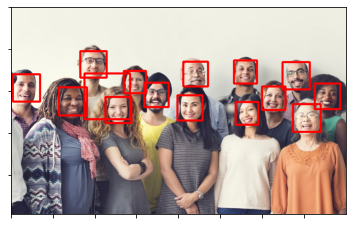

In [4]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
img=cv2.imread("/content/drive/My Drive/photo_00.jpg")    # テスト画像の読み込み
image=cv2.imread("/content/drive/My Drive/photo_00.jpg",0)
img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)    # RGBに変換
HAAR_FILE= "/content/drive/My Drive/haarcascade_frontalface_alt.xml"    # 特徴の読み込み
cascade=cv2.CascadeClassifier(HAAR_FILE)
face=cascade.detectMultiScale(image)     # 顔検出
for x,y,w,h in face:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)   # 顔を四角で囲む
plt.grid(False)  # グリッドとxy軸ラベルが表示されるので非表示にする
plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.imshow(img)

### （その他）メモ書きなど

---